# Feature Binning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

C:\Users\moham\AppData\Local\Temp\ipykernel_2324\3215187068.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("./Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(columns=['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Age.min()

18

In [7]:
df.Age.max()

92

In [8]:
labels = ['0-20','21-40','41-60','Above 61']
bins  = [0,20,40,60,100]

In [9]:
df['Age_bins'] = pd.cut(df.Age, bins, labels=labels, include_lowest=True)

In [10]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,41-60
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,41-60
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,21-40
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,41-60
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,21-40


In [11]:
df.to_csv('test.csv')

In [12]:
data = pd.read_csv("./test.csv")
data.head()

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [13]:
data.isnull().sum()

Unnamed: 0         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Age_bins           0
dtype: int64

In [14]:
data.Age_bins.value_counts()

Age_bins
21-40       6330
41-60       3117
Above 61     464
0-20          89
Name: count, dtype: int64

# Making the bar chart easier to read.

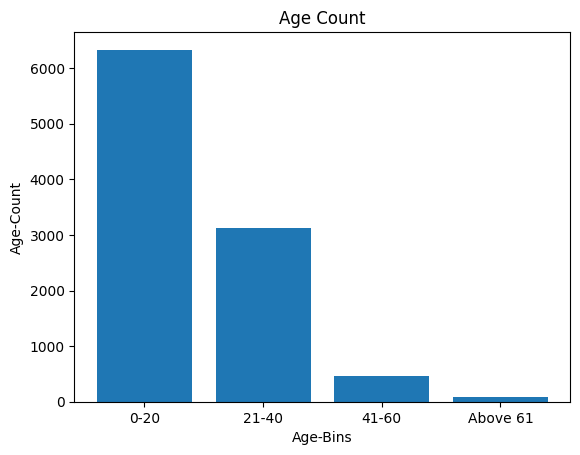

In [ ]:
#  making teh bar chart on the data
plt.bar(labels, df.Age_bins.value_counts())

# giving the title
plt.title("Age Count")

# Giving X & Y Labels
plt.xlabel("Age-Bins")
plt.ylabel("Age-Count")

# Visualizing the plt
plt.show()

In [16]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

C:\Users\moham\AppData\Local\Temp\ipykernel_2324\2111627238.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,y[i],y[i])


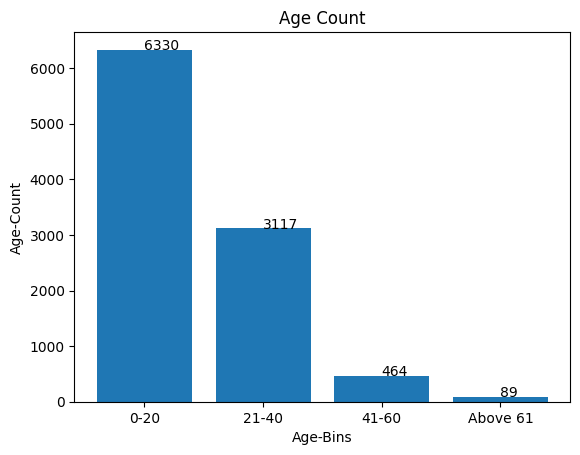

In [17]:
#  making teh bar chart on the data
plt.bar(labels, df.Age_bins.value_counts())

# add labels
add_labels(labels,df.Age_bins.value_counts())

# giving teh title
plt.title("Age Count")

# Giving X & Y Labels
plt.xlabel("Age-Bins")
plt.ylabel("Age-Count")

# Visualizing the plt
plt.show()